**Foreground detection with the GrabCut algorithm**

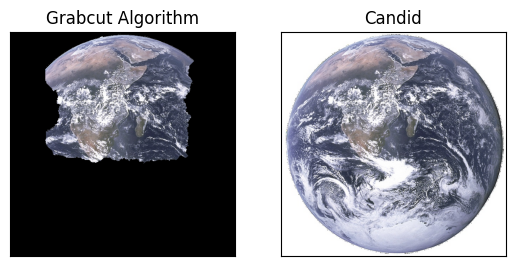

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
original = cv2.imread('earth.jpg')
img = original.copy()
mask = np.zeros(img.shape[:2], np.uint8)

# Creating zero-filled background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (100, 1, 421, 378)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) #iteration: 5

mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Grabcut Algorithm")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Candid")
plt.xticks([])
plt.yticks([])
plt.show()

**Image segmentation with the Watershed algorithm**

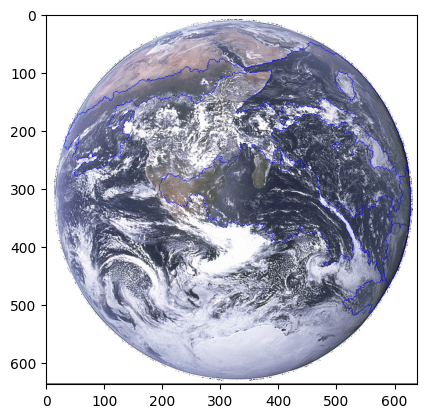

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('earth.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# Removing noise.
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations = 2)

# Finding the sure background region.
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding the sure foreground region.
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(
dist_transform, 0.7*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

# Finding the unknown region.
unknown = cv2.subtract(sure_bg, sure_fg)

# Labeling the foreground objects.
ret, markers = cv2.connectedComponents(sure_fg)

# Adding one to all labels so that sure background is not 0, but 1.
markers += 1

# Labeling the unknown region as 0.
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)
img[markers==-1] = [255,0,0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()